<div style="line-height:0.45">
<h1 style="color:#26BBEE  "> Lasso regularization  </h1>
</div>
<div style="line-height:1">
<h4> Pros:

+ reduce overfitting 
+ misleding measure of R-square fit in case of high-dimensional problems
+ shrinks some features towards zero
</h4>
<span style="display: inline-block;">
    <h3 style="color: lightblue; display: inline;">Keywords:</h3> LASSO + Pandas plots + PolynomialFeatures + Pipeline
</span>
</div>

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LassoCV

In [2]:
X = np.array(10*np.random.randn(1000, 5))
X

array([[ 1.50923433,  4.13973702, 20.6092164 ,  1.96633542, -7.62483704],
       [-2.93382044, 18.82822789, 13.8835336 ,  3.15418937, 14.91243821],
       [ 1.78626757,  3.72493133, 21.31993673, -7.0553676 , -3.49542283],
       ...,
       [-0.03482249,  6.65218612,  4.36772218, -5.28862776, -0.99779382],
       [ 0.67037113,  1.79457817,  7.84901062, 15.78594766, 17.5274324 ],
       [20.97990224, 21.19561462,  0.27157263, -1.11191671, 24.40982442]])

In [3]:
len(X)

1000

In [4]:
df = pd.DataFrame(X, columns=['Feature' + str(l) for l in range(1,6)])
df

,Feature1,Feature2,Feature3,Feature4,Feature5
0,1.509234,4.139737,20.609216,1.966335,-7.624837
1,-2.933820,18.828228,13.883534,3.154189,14.912438
2,1.786268,3.724931,21.319937,-7.055368,-3.495423
3,19.809189,3.876366,6.919059,-1.411238,-7.734946
4,22.373482,9.937023,5.400780,10.051958,-8.738478
...,...,...,...,...,...
995,-10.745093,4.654107,-9.483960,4.970937,-11.349256
996,2.654756,-14.948901,-2.879504,10.751479,-5.123121
997,-0.034822,6.652186,4.367722,-5.288628,-0.997794
998,0.670371,1.794578,7.849011,15.785948,17.527432


<h2 style="color:#26BBEE  "> Plotting with Pandas  </h2>
Create histograms for each column in a DataFrame

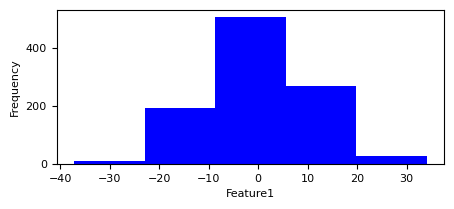

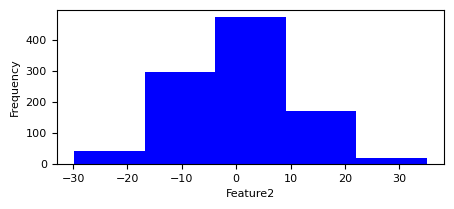

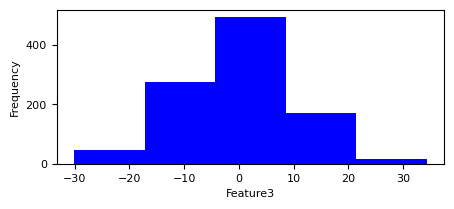

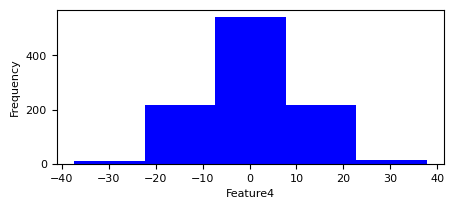

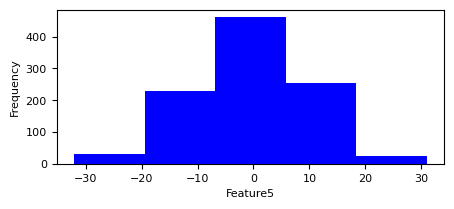

In [5]:
for column in df.columns:
    df[column].plot(kind='hist', bins=5, figsize=(5, 2), fontsize=8, color='blue')
    plt.xlabel(column, fontsize=8)
    plt.ylabel('Frequency', fontsize=8)
    plt.show()

# or 
#for i in df.columns:
#    df.hist(i, bins=5, xlabelsize=15, ylabelsize=15, figsize=(7,3))

#### The function is defined as:

$
f(x_1,x_2,x_3,x_4,x_5) = 3x_1^2 + 4x_2 + 0.8x_1x_3^3 + 3x_4x_5 + 0.6x_5^4 + 3.4x_5 + x_1x_4x_5 + \gamma(x)
$

where $\gamma(x)$ is defined as:

$
\gamma(x) = f(x | \mu, \theta^2) = \frac{1}{\sqrt{2\pi\theta}} \cdot \exp\left(-\frac{(x-\mu)^2}{2\theta^2}\right)
$

In [6]:
""" Add groundtruth values to learn as targets. """

df['y']=3*df['Feature1']**2 + 4*df['Feature2'] + 0.8*df['Feature3']**3*df['Feature1'] \
+ 3*df['Feature4']*df['Feature5'] + 0.6*df['Feature5']**4 + 3.4*df['Feature1']*df['Feature4']*df['Feature5'] \
+ 30*np.random.normal(loc=5,scale=2)

In [7]:
df.head()

,Feature1,Feature2,Feature3,Feature4,Feature5,y
0,1.509234,4.139737,20.609216,1.966335,-7.624837,12655.871816
1,-2.933820,18.828228,13.883534,3.154189,14.912438,23321.501467
2,1.786268,3.724931,21.319937,-7.055368,-3.495423,14343.465200
3,19.809189,3.876366,6.919059,-1.411238,-7.734946,9515.086993
4,22.373482,9.937023,5.400780,10.051958,-8.738478,1071.737304


### => Plot variables

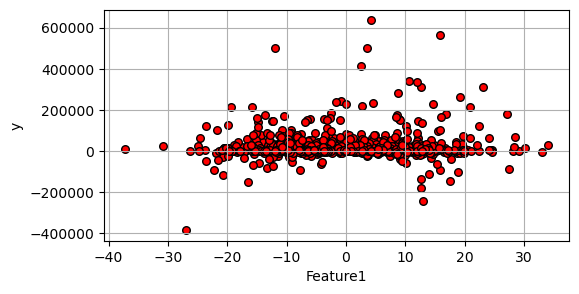

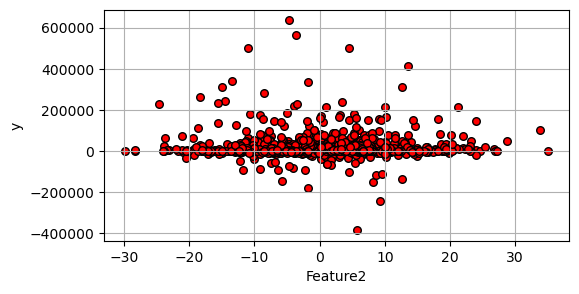

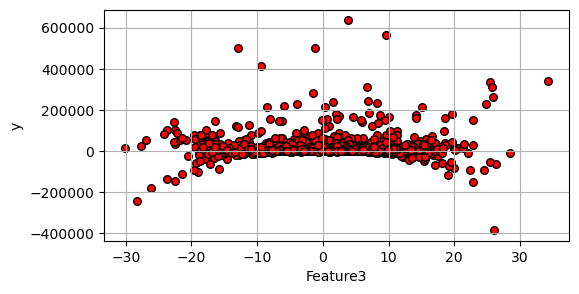

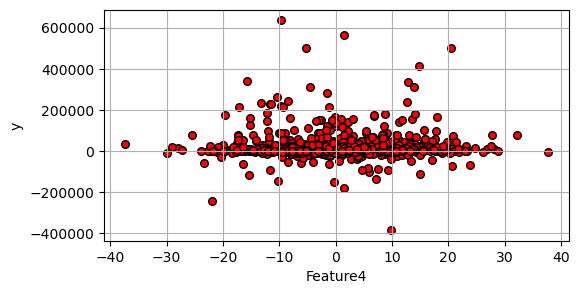

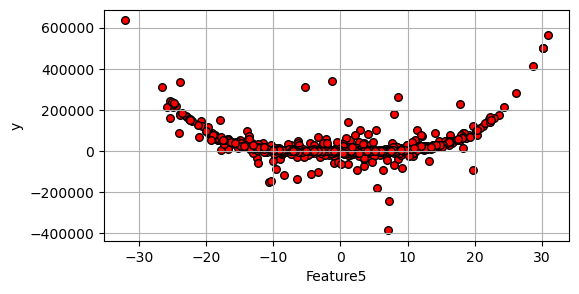

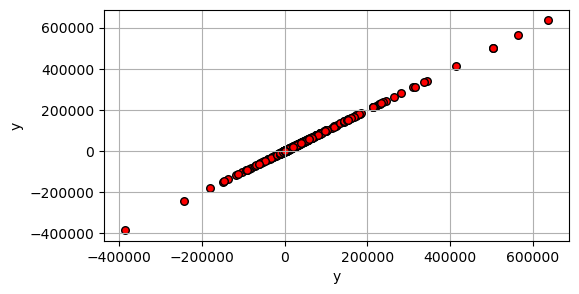

In [8]:
for i in df.columns:
    df.plot.scatter(i, 'y', edgecolors=(0,0,0), s=30, c='r', grid=True, figsize=(6, 3))

<h2 style="color:#26BBEE  "> Standard Linear Regressor  </h2>

In [9]:
linear_model = LinearRegression()

X_linear = df.drop('y',axis=1)
y_linear = df['y']

In [10]:
# Train
linear_model.fit(X_linear, y_linear)
# Predict
y_pred_linear = linear_model.predict(X_linear)

In [11]:
# Root-mean-square error
RMSE_linear = np.sqrt(np.sum(np.square(y_pred_linear-y_linear)))
RMSE_linear

1921610.1133484605

In [12]:
coeff_linear = pd.DataFrame(linear_model.coef_,index=df.drop('y',axis=1).columns, columns=['Linear model coefficients'])
coeff_linear

,Linear model coefficients
Feature1,282.648468
Feature2,-158.615919
Feature3,341.655535
Feature4,77.398744
Feature5,-243.327103


In [13]:
# R2 value
linear_model.score(X_linear,y_linear)

0.007840073239085865

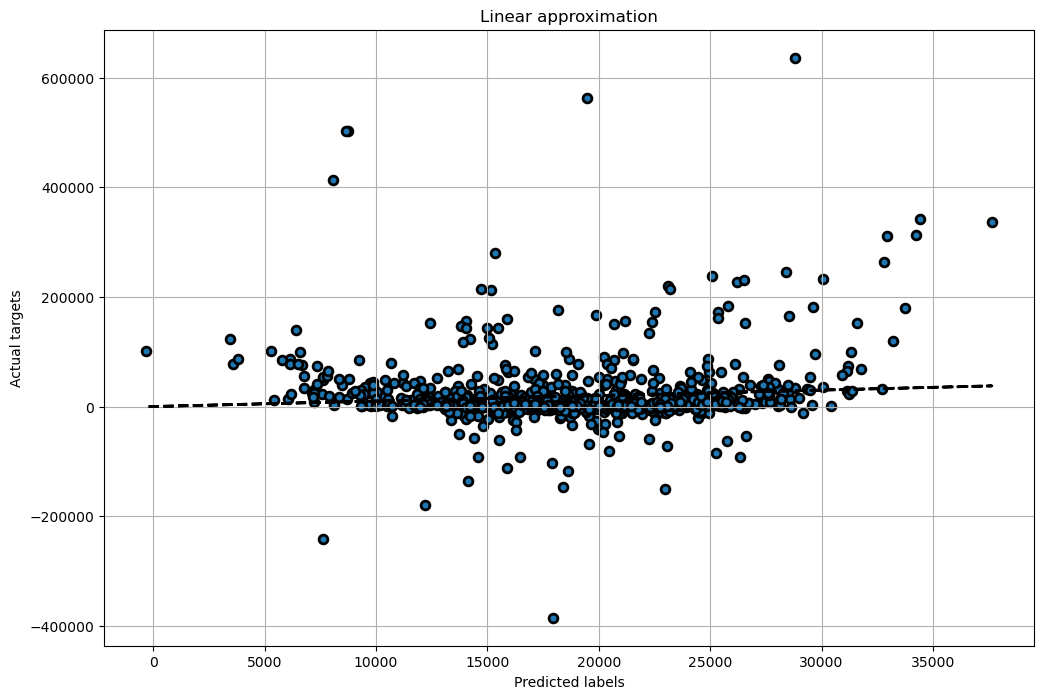

In [14]:
plt.figure(figsize=(12,8))
plt.title("Linear approximation")
plt.xlabel("Predicted labels",fontsize=10)
plt.ylabel("Actual targets",fontsize=10)
plt.grid(1)
plt.scatter(y_pred_linear,y_linear,edgecolors=(0,0,0), lw=2, s=40)
plt.plot(y_pred_linear,y_pred_linear, 'k--', lw=2)

### =>  Using Polynomial features to increase fit

In [22]:
poly = PolynomialFeatures(2, include_bias=False)

In [29]:
# # Transform the input features to polynomial features
X_poly = poly.fit_transform(X)
# Get the names of the original features
original_feature_names = ['Feature' + str(l) for l in range(1, 6)]

# Generate the feature names for the polynomial features
X_poly_feature_names = [f'{original_feature_names[i]}_{j}' for i in range(5) for j in range(X_poly.shape[1])]

print(len(X_poly_feature_names))
X_poly_feature_names[8:25] 

100


['Feature1_8',
 'Feature1_9',
 'Feature1_10',
 'Feature1_11',
 'Feature1_12',
 'Feature1_13',
 'Feature1_14',
 'Feature1_15',
 'Feature1_16',
 'Feature1_17',
 'Feature1_18',
 'Feature1_19',
 'Feature2_0',
 'Feature2_1',
 'Feature2_2',
 'Feature2_3',
 'Feature2_4']

In [48]:
# Transform the input features to polynomial features
X_poly = poly.fit_transform(X)

# Get the names of the original features
original_feature_names = ['Feature' + str(l) for l in range(1, 6)]

# Generate the feature names for the polynomial features
X_poly_feature_names = [
    f'{original_feature_names[i]}_{j}'
    for i in range(len(original_feature_names))
    for j in range(len(original_feature_names) - 1)
]


In [49]:
# Create the DataFrame with the correct number of columns and feature names
df_poly = pd.DataFrame(X_poly, columns=X_poly_feature_names)

In [50]:
df_poly['y']=df['y']
df_poly.head()

,Feature1_0,Feature1_1,Feature1_2,Feature1_3,Feature2_0,Feature2_1,Feature2_2,Feature2_3,Feature3_0,Feature3_1,...,Feature3_3,Feature4_0,Feature4_1,Feature4_2,Feature4_3,Feature5_0,Feature5_1,Feature5_2,Feature5_3,y
0,-0.490724,-2.513508,12.145229,1.956249,15.731751,0.240810,1.233438,-5.959952,-0.959978,-7.719943,...,-30.527125,-4.917045,-39.541874,147.506587,23.759086,191.065713,3.826908,30.775214,247.487978,12655.871816
1,-3.141586,-24.390020,-8.806829,-17.818155,-15.604809,9.869565,76.623356,27.667413,55.977273,49.023855,...,214.798724,434.585146,380.601591,77.560230,156.921434,137.428874,317.486635,278.048893,243.510051,23321.501467
2,13.079068,0.955105,-7.079688,-13.892166,-6.989886,171.062026,12.491880,-92.595729,-181.696585,-91.421198,...,-6.761844,-13.268473,-6.676073,50.121989,98.352206,49.486216,192.992272,97.104657,48.858508,14343.465200
3,-6.560573,10.537875,1.063890,1.710801,-2.986495,43.041116,-69.134499,-6.979727,-11.223834,19.593119,...,11.211138,18.028207,-31.471313,1.131862,1.820104,-3.177302,2.926840,-5.109299,8.919153,9515.086993
4,5.559189,-20.005676,-0.594440,-0.325257,-12.546574,30.904586,-111.215342,-3.304605,-1.808163,-69.748781,...,11.892178,6.506977,251.002697,0.353359,0.193346,7.458188,0.105792,4.080855,157.416521,1071.737304


In [51]:
""" Split datasets """
X_train = df_poly.drop('y',axis=1)
y_train = df_poly['y']

In [55]:
# Create a pipeline that includes data normalization and linear regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),       # Normalize the data
    ('regression', LinearRegression())  # Apply linear regression
])

# Fit the model
pipeline.fit(X_train, y_train)

line = LinearRegression()


In [59]:
model_line=line.fit(X_train,y_train)
y_poly = line.predict(X_train)

In [60]:
# Root-mean-square error
RMSE_poly=np.sqrt(np.sum(np.square(y_poly - y_train)))
RMSE_poly

1895789.862798903

In [61]:
coeff_poly = pd.DataFrame(model_poly.coef_, index=df_poly.drop('y',axis=1).columns, columns=['Coefficients polynomial model'])
coeff_poly

,Coefficients polynomial model
Feature1_0,-207.541282
Feature1_1,140.050924
Feature1_2,-425.085788
Feature1_3,138.019516
Feature2_0,86.437953
Feature2_1,16.021547
Feature2_2,43.751327
Feature2_3,25.447495
Feature3_0,6.667522
Feature3_1,54.644221


In [62]:
print ("R2 value of simple polynomial model:", model_poly.score(X_train,y_train))

R2 value of simple polynomial model: 0.034323809183025245


<h2 style="color:#26BBEE  "> Polynomial model with cross-validation and LASSO regularization</h2>

In [64]:
model1 = LassoCV(cv=10, verbose=0, eps=0.001, n_alphas=100, tol=0.0001, max_iter=5000)

In [66]:
# Train
model1.fit(X_train,y_train)
# Predict
y_pred1 = np.array(model1.predict(X_train))

In [67]:
RMSE_1 = np.sqrt(np.sum(np.square(y_pred1-y_train)))
RMSE_1

1910865.859752748

In [68]:
coeff1 = pd.DataFrame(model1.coef_,index=df_poly.drop('y',axis=1).columns, columns=['Coefficients Metamodel'])
coeff1

,Coefficients Metamodel
Feature1_0,-0.000000
Feature1_1,0.000000
Feature1_2,-0.000000
Feature1_3,0.000000
Feature2_0,0.000000
Feature2_1,6.409803
Feature2_2,17.127996
Feature2_3,0.644278
Feature3_0,0.000000
Feature3_1,37.587669


In [69]:
""" Return the coefficient of determination of the prediction.
R^2 = (1 - u / v)
where: 
    u is the residual sum of squares ((y_true - y_pred)** 2).sum()
    v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum()
"""
model1.score(X_train, y_train)

0.01890393706115001

In [70]:
""" Get alpha => the chosen regularization parameter determined by the LassoCV model through cross-validation. 
It determines the trade-off between fitting the training data well and keeping the model coefficients small.
""" 
model1.alpha_

199069.0437538384

In [71]:
# Filter out coefficients, taking the rows where the coefficient value in the 'Coefficients Metamodel' column is nonzero
coeff1[coeff1['Coefficients Metamodel']!=0]

,Coefficients Metamodel
Feature2_1,6.409803
Feature2_2,17.127996
Feature2_3,0.644278
Feature3_1,37.587669
Feature4_1,1.801061
Feature4_2,0.415596
Feature5_2,17.614989
Feature5_3,20.225282


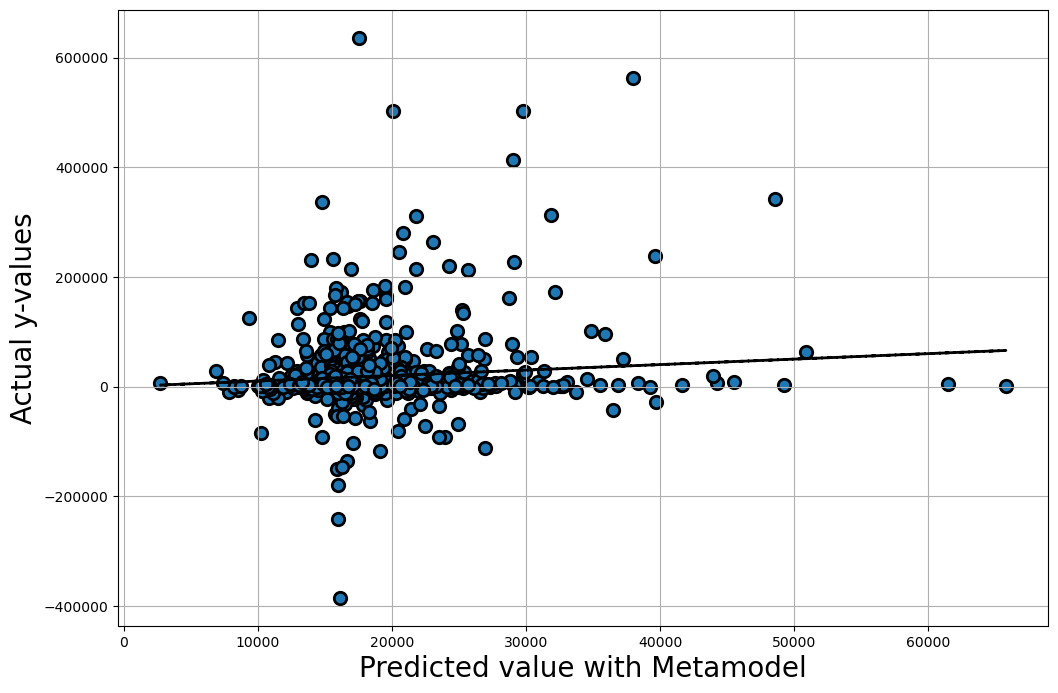

In [72]:
plt.figure(figsize=(12,8))
plt.xlabel("Predicted value with Metamodel",fontsize=20)
plt.ylabel("Actual y-values",fontsize=20)
plt.grid(1)
plt.scatter(y_pred1,y_train,edgecolors=(0,0,0),lw=2,s=80)
plt.plot(y_pred1,y_pred1, 'k--', lw=2)

### => Results:

(-5.933852215131298,
 -2.6338522151312977,
 421445375.98407435,
 9071201565.029001)

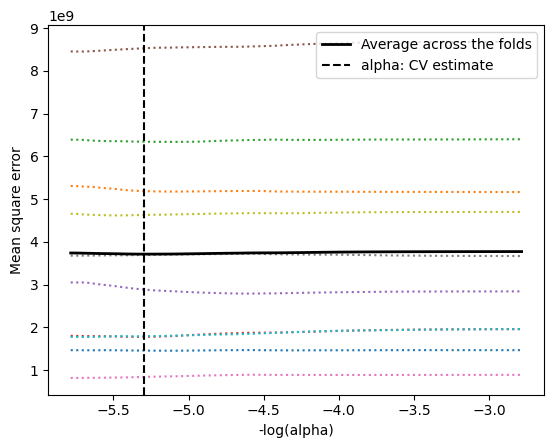

In [73]:
# Display results
m_log_alphas = -np.log10(model1.alphas_)

plt.figure()
ymin, ymax = 2300, 3800
plt.plot(m_log_alphas, model1.mse_path_, ':')
plt.plot(m_log_alphas, model1.mse_path_.mean(axis=-1), 'k', label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model1.alpha_), linestyle='--', color='k', label='alpha: CV estimate')
plt.legend()

plt.xlabel('-log(alpha)')
plt.ylabel('Mean square error')
plt.axis('tight')